In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from simulation import *
from analysis import *
from end_to_end import *

# SIR Model on G(n,p) Network

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

# Experimental Design

The cases we shall examine are as follows:

1. **Control case**: no interventions
2. **Intervention A**: stopping-intake intervention and social distancing intervention
3. **Intervention B**: release intervention, stopping-intake intervention, and social distancing intervention

For 2. and 3., we try many different social distancing transmission rates.

In [41]:
# Parameters
N = 3000
p = 0.02
tau = 0.03
gamma = 0.07
death_rate = 0.012
max_time = 60
background_inmate_turnover = 20
initial_infected_list = [0]
# By default, starts with only inmate 0 infected

# Build graph on which to run all simulations
G = nx.fast_gnp_random_graph(N, p)

## Control Case

Starting simulation...
Using initial infected list to set initial infected.
Simulation completed.

############### Parameters ###############
{'release_number': 0, 'number_infected_before_release': 10000, 'stop_inflow_at_intervention': False, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Control Case', 'social_distance': False, 'social_distance_tau': 0.01, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  3922
Total # of deaths:  41.0
Infections peaked at:
	Time: 7.478310124536154
	# of infected: 2477


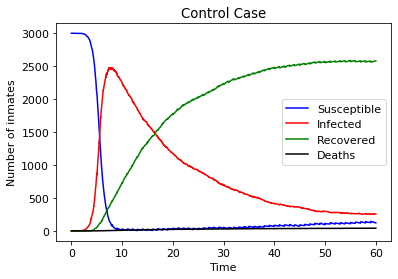

Plot saved with filename: Control_Case.png
Wall time: 11.5 s


<Figure size 432x288 with 0 Axes>

In [73]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            number_infected_before_release=10000, 
                            stop_inflow_at_intervention=False,
                            social_distance=False,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Control Case'))

## Intervention A: stopping-intake intervention and social distancing intervention

**NOTE**: For the intervention trials, the intervention does not occur exactly when there are `number_infected_before_release` infected inmates. Instead, the actual intervention occurs at the next integer-valued time step after the `number_infected_before_release` condition has been met. By the time it occurs, the '# of infected' may be much higher than `number_infected_before_release` (I've seen it being 4.5x higher). So, I have ran trials repeatedly until the intervention kicks in at a similar # of infected for each experiment case (around 110 - 120 infected people when the intervention kicks in).

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 3
	# of infected: 102
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 0, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention A: Low Social Distancing', 'social_distance': True, 'social_distance_tau': 0.015, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2900
Total # of deaths:  31.0
Infections peaked at:
	Time: 9.990608033364197
	# of infected: 2017


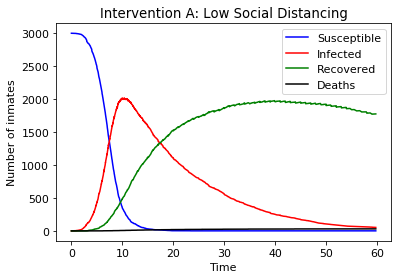

Plot saved with filename: Intervention_A__Low_Social_Distancing.png
Wall time: 6.15 s


<Figure size 432x288 with 0 Axes>

In [74]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            social_distance_tau=tau/2,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Intervention A: Low Social Distancing'))

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 3
	# of infected: 102
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 0, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention A: Medium Social Distancing', 'social_distance': True, 'social_distance_tau': 0.0075, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2763
Total # of deaths:  30.0
Infections peaked at:
	Time: 17.38687138783807
	# of infected: 1414


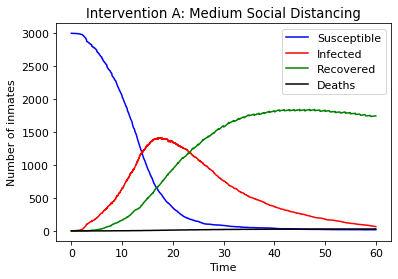

Plot saved with filename: Intervention_A__Medium_Social_Distancing.png
Wall time: 5.66 s


<Figure size 432x288 with 0 Axes>

In [98]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            social_distance_tau=tau/4,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Intervention A: Medium Social Distancing'))

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 4
	# of infected: 116
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 0, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention A: High Social Distancing', 'social_distance': True, 'social_distance_tau': 0.00375, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2131
Total # of deaths:  21.0
Infections peaked at:
	Time: 30.817873463206837
	# of infected: 692


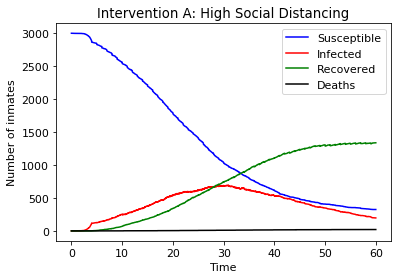

Plot saved with filename: Intervention_A__High_Social_Distancing.png
Wall time: 4.94 s


<Figure size 432x288 with 0 Axes>

In [90]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            social_distance_tau=tau/8,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Intervention A: High Social Distancing'))

## Intervention B: release intervention, stopping-intake intervention, and social distancing intervention

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 4
	# of infected: 115
	Releasing 500 inmates.
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: Low Social Distancing', 'social_distance': True, 'social_distance_tau': 0.015, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2398
Total # of deaths:  25.0
Infections peaked at:
	Time: 12.371504031271726
	# of infected: 1629


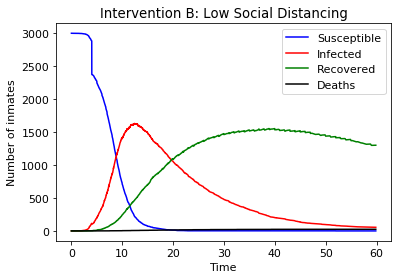

Plot saved with filename: Intervention_B__Low_Social_Distancing.png
Wall time: 5.42 s


<Figure size 432x288 with 0 Axes>

In [94]:
%%time
t, S, I, R, D = (end_to_end(release_number=500, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            social_distance_tau=tau/2,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Intervention B: Low Social Distancing'))

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 3
	# of infected: 100
	Releasing 500 inmates.
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: Medium Social Distancing', 'social_distance': True, 'social_distance_tau': 0.0075, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  2199
Total # of deaths:  23.0
Infections peaked at:
	Time: 18.956047332715983
	# of infected: 1039


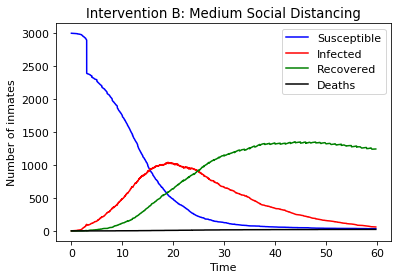

Plot saved with filename: Intervention_B__Medium_Social_Distancing.png
Wall time: 4.31 s


<Figure size 432x288 with 0 Axes>

In [83]:
%%time
t, S, I, R, D = (end_to_end(release_number=500, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            social_distance_tau=tau/4,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Intervention B: Medium Social Distancing'))

Starting simulation...
Using initial infected list to set initial infected.
Release intervention condition met:
	Time: 3
	# of infected: 114
	Releasing 500 inmates.
	Stopping inmate inflow.
	Enacting social distancing.
Simulation completed.

############### Parameters ###############
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'death_rate': 0.012, 'tau': 0.03, 'gamma': 0.07, 'rho': 0.0003, 'max_time': 60, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: High Social Distancing', 'social_distance': True, 'social_distance_tau': 0.00375, 'custom_graph': <networkx.classes.graph.Graph object at 0x00000297A1964820>, 'initial_infected_list': [0]}

############### Results ##################
Total # of infections:  1397
Total # of deaths:  13.0
Infections peaked at:
	Time: 26.753896560584508
	# of infected: 417


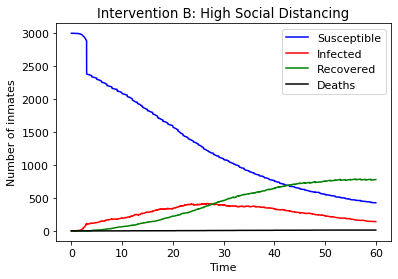

Plot saved with filename: Intervention_B__High_Social_Distancing.png
Wall time: 3.22 s


<Figure size 432x288 with 0 Axes>

In [108]:
%%time
t, S, I, R, D = (end_to_end(release_number=500, 
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True,
                            social_distance=True,
                            social_distance_tau=tau/8,
                            background_inmate_turnover=background_inmate_turnover, 
                            death_rate=death_rate, 
                            tau=tau, 
                            gamma=gamma,  
                            max_time=max_time,  
                            custom_graph=G, 
                            initial_infected_list=initial_infected_list, 
                            save_plot=True,
                            title='Intervention B: High Social Distancing'))